In [1]:
# sklearn 당뇨데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

In [2]:
df_X.shape, df_y.shape

((442, 10), (442,))

In [3]:
df_X[:3, :]  # 이미 정규화되어있다. -0.2 ~ 0.2 사이의 값을 갖도록 조정되어있음

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
df_y[:3]

array([151.,  75., 141.])

In [5]:
# 훈련세트 / 테스트세트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [6]:
def MSE(y_pred, y):
    return ((y_pred - y)**2).mean()

In [7]:
import numpy as np

class MultiLinear:
  def __init__(self,learning_rate=0.001):
    self.W=None #모델의 weight
    self.b=None #모델의 bias
    self.learning_rate=learning_rate 
    self.losses=[] #매 에포크마다 손실을 저장하기 위한 리스트
    self.weight_history=[] #매 에포크마다 계산된 weight를 저장하기 위한 리스트
    self.bias_history=[] #매 에포크마다 계산된 bias를 저장하기 위한 리스트

  def predict(self,X):
    y_pred = X.dot(self.W) + self.b
    return y_pred

  def gradient(self,X,y):
    y_pred=self.predict(X)
    N = len(y)
    dW = (1/N) * 2 * np.dot(X.T, y_pred - y)
    db= 2 * (y_pred - y).mean()
    return dW,db

  def fit(self,X,y,epochs=1001):
    self.W=np.random.randn(X.shape[1]) # initialize weights using normal distribution
    self.b=np.random.randn() # initialize bias
    for epoch in range(epochs):
        dW, db = self.gradient(X,y)
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        
        L = MSE(self.predict(X) , y)
        self.losses.append(L)
        if epoch % 10 == 0:
            print('Iteration %d : Loss %0.4f' % (epoch, L))
        self.weight_history.append(self.W) #weight 배열 저장
        self.bias_history.append(self.b) #bias값 저장


In [8]:
model=MultiLinear(learning_rate=0.01)
model.fit(X_train, y_train, epochs=15001)

Iteration 0 : Loss 28607.5092
Iteration 10 : Loss 21111.3759
Iteration 20 : Loss 16104.2846
Iteration 30 : Loss 12758.8968
Iteration 40 : Loss 10522.8775
Iteration 50 : Loss 9027.4858
Iteration 60 : Loss 8026.5483
Iteration 70 : Loss 7355.7190
Iteration 80 : Loss 6905.2794
Iteration 90 : Loss 6601.9812
Iteration 100 : Loss 6396.9233
Iteration 110 : Loss 6257.4593
Iteration 120 : Loss 6161.7941
Iteration 130 : Loss 6095.3773
Iteration 140 : Loss 6048.4948
Iteration 150 : Loss 6014.6617
Iteration 160 : Loss 5989.5483
Iteration 170 : Loss 5970.2643
Iteration 180 : Loss 5954.8799
Iteration 190 : Loss 5942.1069
Iteration 200 : Loss 5931.0851
Iteration 210 : Loss 5921.2402
Iteration 220 : Loss 5912.1891
Iteration 230 : Loss 5903.6755
Iteration 240 : Loss 5895.5287
Iteration 250 : Loss 5887.6344
Iteration 260 : Loss 5879.9165
Iteration 270 : Loss 5872.3241
Iteration 280 : Loss 5864.8230
Iteration 290 : Loss 5857.3907
Iteration 300 : Loss 5850.0119
Iteration 310 : Loss 5842.6764
Iteration 320 

In [9]:
MSE(model.predict(X_test), y_test)

2961.165556847979

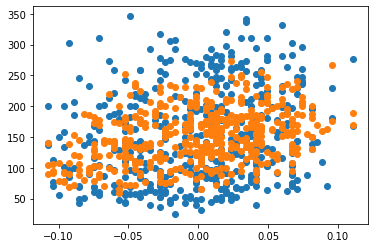

In [10]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(df_X[:, 0], df_y, label='Actual')
plt.scatter(df_X[:, 0], model.predict(df_X), label='Predicted')
plt.show()